In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import re
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Gather

In [2]:
# read in csv file as a Pandas DataFrame
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# create folder 'image_predictions' if it does not exist and use requests library to download tsv file from website
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# save file in computer
with open(os.path.join(folder_name, url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)

# check file
os.listdir(folder_name)

['image-predictions.tsv']

In [5]:
# read in tsv file as a Pandas DataFrame
df_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

In [6]:
# Personal API keys, secrets, and tokens have been replaced with placeholders
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

In [7]:
# Variables created for tweepy query
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [8]:
# use for-loop which will add each available tweet to a new line of tweet_json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in df_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 598
Rate limit reached. Sleeping for: 662


In [9]:
# use for-loop to append each tweet into a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [10]:
# create tweet_info DataFrame
df_tweet = pd.DataFrame()

In [11]:
# Add selected variables to tweet_info DataFrame
df_tweet['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
df_tweet['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
df_tweet['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

### Assess

In [12]:
# sample 10 rows of df_archive dataframe
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
477,815990720817401858,NaN,NaN,2017-01-02 18:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's one of the rare doggos that do...,NaN,NaN,NaN,https://www.gofundme.com/surgeryforjacktheminp...,11,10,Jack,None,None,None,None
318,834574053763584002,NaN,NaN,2017-02-23 01:22:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo fully pupared for a shower. H*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834574053...,13,10,None,doggo,None,None,None
2032,671763349865160704,NaN,NaN,2015-12-01 18:50:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mark. He's a good dog. Always rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671763349...,9,10,Mark,None,None,None,None
1428,697616773278015490,NaN,NaN,2016-02-11 03:02:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper doubles as a hallway rug. Very rar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697616773...,11,10,None,None,None,pupper,None
2266,667530908589760512,NaN,NaN,2015-11-20 02:32:25 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Naphaniel. He doesn't necessarily enjoy h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667530908...,10,10,Naphaniel,None,None,None,None
1142,727524757080539137,NaN,NaN,2016-05-03 15:46:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper had to undergo emergency haircut s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727524757...,10,10,None,None,None,pupper,None
676,789314372632018944,NaN,NaN,2016-10-21 03:56:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOO...,NaN,NaN,NaN,https://twitter.com/sebscat/status/78881832853...,13,10,None,None,None,None,None
1375,701889187134500865,NaN,NaN,2016-02-22 21:59:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bilbo. He's not emotionally prepared t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701889187...,11,10,Bilbo,None,None,None,None
1934,674014384960745472,NaN,NaN,2015-12-07 23:55:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Aiden. His eyes are magical. Love...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674014384...,11,10,Aiden,None,None,None,None
1468,694206574471057408,NaN,NaN,2016-02-01 17:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Martha come take a look at this. I'm so fed u...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/694206574...,10,10,None,None,None,None,None


In [13]:
# view info of df_archive dataframe
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# view shape property of df_archive dataframe
df_archive.shape

(2356, 17)

In [15]:
df_archive.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
timestamp,2356,2356,2015-11-25 19:46:30 +0000,1
source,2356,4,"<a href=""http://twitter.com/download/iphone"" r...",2221
text,2356,2356,Say hello to Pherb. He does parkour. 9/10 http...,1
retweeted_status_timestamp,181,181,2017-07-19 00:47:34 +0000,1
expanded_urls,2297,2218,https://twitter.com/dog_rates/status/683391852...,2
name,2356,957,None,745
doggo,2356,2,None,2259
floofer,2356,2,None,2346
pupper,2356,2,None,2099
puppo,2356,2,None,2326


In [16]:
# view descriptive statistics df_archive DataFrame
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# sample 10 rows of df_predictions dataframe
df_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
895,699446877801091073,https://pbs.twimg.com/media/CbTvNpoW0AEemnx.jpg,3,Pembroke,0.969400,True,Cardigan,0.026059,True,Chihuahua,0.003505,True
1598,799297110730567681,https://pbs.twimg.com/media/CxeseRgUoAM_SQK.jpg,1,malamute,0.985028,True,Siberian_husky,0.005834,True,Eskimo_dog,0.005443,True
1817,834086379323871233,https://pbs.twimg.com/media/C5NFIsjWQAEI93t.jpg,1,bath_towel,0.736759,False,sleeping_bag,0.062959,False,Labrador_retriever,0.045263,True
942,704113298707505153,https://pbs.twimg.com/media/CcWDTerUAAALORn.jpg,2,otter,0.945537,False,mink,0.018231,False,sea_lion,0.015861,False
921,701981390485725185,https://pbs.twimg.com/media/Cb3wWWbWEAAy06k.jpg,1,Pomeranian,0.491022,True,weasel,0.130879,False,Yorkshire_terrier,0.099241,True
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1498,783695101801398276,https://pbs.twimg.com/media/CuA-iRHXYAAWP8e.jpg,3,chow,0.314265,True,golden_retriever,0.300435,True,Australian_terrier,0.049487,True
1192,739979191639244800,https://pbs.twimg.com/media/CkTvJTdXAAAEfbT.jpg,1,Irish_water_spaniel,0.285800,True,wig,0.240653,False,toy_poodle,0.074914,True
1230,745712589599014916,https://pbs.twimg.com/media/CllNnkWWMAEDIAR.jpg,1,seat_belt,0.379055,False,chow,0.062754,True,minibus,0.052423,False
1897,850380195714523136,https://pbs.twimg.com/ext_tw_video_thumb/85038...,1,Yorkshire_terrier,0.249012,True,Maltese_dog,0.166364,True,Shih-Tzu,0.142254,True


In [18]:
# view info of df_predictions dataframe
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
# view shape property of df_predictions dataframe
df_predictions.shape

(2075, 12)

In [20]:
df_predictions.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
jpg_url,2075,2009,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,2
p1,2075,378,golden_retriever,150
p2,2075,405,Labrador_retriever,104
p3,2075,408,Labrador_retriever,79


In [21]:
# View descriptive statistics of df_predictions DataFrame
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
# sample 10 rows of df_tweet dataframe
df_tweet.sample(10)

,id,retweet_count,favorite_count
2201,668297328638447616,294,614
1226,711652651650457602,942,3957
2324,666058600524156928,56,108
1459,693486665285931008,654,1831
2010,671763349865160704,918,1671
598,796484825502875648,1878,7985
1381,699423671849451520,338,1414
2103,670361874861563904,66,327
33,885528943205470208,6100,34730
55,881536004380872706,15174,47733


In [23]:
# view info of df_tweet dataframe
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
id                2334 non-null int64
retweet_count     2334 non-null int64
favorite_count    2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [24]:
# view shape property of df_tweet dataframe
df_tweet.shape

(2334, 3)

In [25]:
# View descriptive statistics of df_twitter DataFrame
df_tweet.describe()

,id,retweet_count,favorite_count
count,2.334000e+03,2334.000000,2334.000000
mean,7.419439e+17,2824.634533,7786.586547
std,6.819580e+16,4780.267812,12082.378435
min,6.660209e+17,1.000000,0.000000
25%,6.782926e+17,568.000000,1352.750000
50%,7.184574e+17,1321.000000,3390.500000
75%,7.986600e+17,3295.000000,9557.750000
max,8.924206e+17,81139.000000,161328.000000


In [26]:
# Set column width to infinite so entire content of 'text' column is displayed
pd.set_option('display.max_colwidth', -1)

In [27]:
# view rows in df_archive which contain '&amp;' instead of '&' in 'text' column
df_archive[df_archive.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Indie. She's not a fan of baths but she's definitely a fan of hide &amp; seek. 12/10 click the link to help Indie\n\nhttps://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https://twitter.com/dog_rates/status/842765311967449089/photo/1,https://twitter.com/dog_rates/status/842765311967449089/photo/1",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe",NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053273591808/photo/1,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1",12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Roosevelt. He's preparing for takeoff. Make sure tray tables are in their full pupright &amp; licked position\n11/10 https://t.co/7CQkn3gHOQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264096874500/photo/1,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,

In [28]:
# sort values of 'name' column alphabetically - lowercase values appear at the bottom
df_archive['name'].sort_values()

1035    Abby        
1021    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al          
875     Albert      
1954    Albert      
144     Albus       
412     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
2238    Alfie       
661     Alfie       
367     Alfie       
1616    Alfie       
858     Alfie       
51      Alfy        
201     Alice       
1701    Alice       
1495    Amber       
1334    Ambrose     
2078    Amy         
2195    Amélie      
         ...        
852     my          
988     not         
335     not         
1747    officially  
1206    old         
993     one         
1936    one         
924     one         
369     one         
2326    quite       
169     quite       
118     quite       
193     quite       
2030    space       
22      such        
2345    the         
2346    the  

In [29]:
# view number of entries for each source
df_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [30]:
# view rows where the value of 'name' is lowercase - indicates that it is not an actual name
df_archive.loc[(df_archive['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

In [31]:
# view rows where the value of 'name' is lowercase and the word 'named' appears in the 'text' column which indicates 
# there is an actual dog name in the text
df_archive.loc[(df_archive['name'].str.islower()) & (df_archive['text'].str.contains('named'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461267722241/photo/1,10,10,a,None,None,None,None
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow!

In [32]:
# view rows where the value of 'name' is lowercase and the words 'name is' appears in the 'text' column which indicates 
# there is an actual dog name in the text
df_archive.loc[(df_archive['name'].str.islower()) & (df_archive['text'].str.contains('name is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,my,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989038297088/photo/1,8,10,a,None,None,None,None


In [33]:
# View row where dog name is 'O' but we can see in the 'text' column that the dog's name is actually 'O'Malley' 
df_archive[df_archive.name == "O"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,None,None,None,None


In [34]:
# view rows where text column contains #.#/# indicating a decimal for the rating numerator, 
# but appears incorrectly in the 'rating_numerator' column
df_archive[df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [35]:
# view row of specific tweet using tweet_id of a tweet that doesn't have a rating 
df_archive[df_archive.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


### Tidyness Issues

1. **Doggo, floofer, pupper, puppo** (dog stage variables) are in separate columns
2. Merge **df_tweet** and **df_predictions** to **df_archive**

### Quality Issues

3. Dataset contains **retweets**
* Some tweets have **no images**
* O'Malley **erroneously named as 'O**'
* **Tweet ID# 810984652412424192** doesn't contain a rating
* 'text' column have **extraneous characters after '&'**
* 'source' column **difficult to read**
* **Incorrect dog names**
* 'None' showing as **Missing values in 'name' and dog stages**
* First occurence  of #/# **erroneously used for the 'rating numerators and denominators' columns** 
* Rating numerators **with decimals** appear incorrectly in the 'rating numerator' column
* **Erroneous datatypes** (timestamp, source, dog stages, tweet_id, in_reply_to_status_id, in_reply_to_user_id)

### Clean

In [36]:
# create copies of the original DataFrames
df_archive_clean = df_archive.copy()
df_predictions_clean = df_predictions.copy()
df_tweet_clean = df_tweet.copy()

1. Create dog stage variable to include doggo, floofer, pupper and puppo. Remove these dog stage columns afterwards.

In [37]:
# Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 
df_archive_clean['dog_stage'] = df_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [38]:
# Create variable of columns that are no longer needed and drop them from the DataFrame 
cols = ['doggo', 'floofer', 'pupper', 'puppo']
df_archive_clean = df_archive_clean.drop(cols, axis=1)

In [39]:
df_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1685,681654059175129088,NaN,NaN,2015-12-29 01:52:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Toffee. He's a happy pupper. Appears dangerously fluffy. Extraordinarily spherical. 12/10 would pet firmly https://t.co/oEXEKt3MHu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681654059175129088/photo/1,12,10,Toffee,pupper
2167,669359674819481600,NaN,NaN,2015-11-25 03:39:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Saydee. She's a Rochester Ecclesiastical. Jumped off cliff and caught stick on way down. 11/10 1st round pick https://t.co/Eh2v0AyJbi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669359674819481600/photo/1,11,10,Saydee,NaN
475,816062466425819140,NaN,NaN,2017-01-02 23:23:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://…,8.159907e+17,4.196984e+09,2017-01-02 18:38:42 +0000,"https://www.gofundme.com/surgeryforjacktheminpin,https://twitter.com/dog_rates/status/815990720817401858/photo/1",11,10,Jack,doggo
1410,699036661657767936,NaN,NaN,2016-02-15 01:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 for all https://t.co/7u6VnZ1UFe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699036661657767936/photo/1,13,10,None,NaN
925,755110668769038337,NaN,NaN,2016-07-18 18:43:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Watson. He trust falls on command. 13/10 it's elementary... (IG: wat.ki) https://t.co/goX3jewkYN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755110668769038337/video/1,13,10,Watson,NaN
1809,676864501615042560,NaN,NaN,2015-12-15 20:40:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Ash. He's just a head now. Lost his body during the Third Crusade. Still in good spirits. 10/10 would pet well https://t.co/NJj2uP0atK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676864501615042560/photo/1,10,10,Ash,NaN
1879,675015141583413248,NaN,NaN,2015-12-10 18:12:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Moe. He's a golden Fetty Woof. Doesn't respect the authorities. Might own a motorhome? 10/10 revolutionary pup https://t.co/JAncIdNp8G,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675015141583413248/photo/1,10,10,Moe,NaN
1108,734559631394082816,NaN,NaN,2016-05-23 01:40:38 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",When your friend is turnt af and you're just trying to chill. 10/10 (vid by @presgang) https://t.co/OufVDk23JC,NaN,NaN,NaN,https://vine.co/v/iExiLXiiHvX,10,10,None,NaN
678,789268448748703744,NaN,NaN,2016-10-21 00:53:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stella. She's happier than I will ever be. 10/10 would trade lives with https://t.co/JSs2bfDtTS,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789268448748703744/photo/1,10,10,Stella,NaN
2069,671134062904504320,NaN,NaN,2015-11-30 01:10:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Clarence. He's a western Alkaline Pita. Very proud of himself for dismembering his stuffed dog pal 8/10 https://t.co/BHxr9O7wJY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671134062904504320/photo/1,8,10,Clarence,NaN


2. Merge df_tweet and df_predictions to df_archive table and drop 'id' column.

In [40]:
df_archive_clean = pd.merge(left=df_archive_clean, right=df_tweet_clean, left_on='tweet_id', right_on='id', how='inner')

In [41]:
df_archive_clean = df_archive_clean.merge(df_predictions_clean, on='tweet_id', how='inner')

In [42]:
df_archive_clean.shape

(2062, 28)

In [43]:
# check if duplicates were created as a result of merging
sum(df_archive_clean.duplicated())

0

In [44]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [45]:
df_archive_clean = df_archive_clean.drop('id', axis=1)
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2062 entries, 0 to 2061
Data columns (total 27 columns):
tweet_id                      2062 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2062 non-null object
source                        2062 non-null object
text                          2062 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2062 non-null object
rating_numerator              2062 non-null int64
rating_denominator            2062 non-null int64
name                          2062 non-null object
dog_stage                     335 non-null object
retweet_count                 2062 non-null int64
favorite_count                2062 non-null int64
jpg_url                       2062 non-null object
img_num                       2062 non

3. Remove retweets

In [46]:
# select rows where 'retweeted_status_id' is null and save to df_archive_clean
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]

In [47]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 2061
Data columns (total 27 columns):
tweet_id                      1988 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1988 non-null object
source                        1988 non-null object
text                          1988 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1988 non-null object
rating_numerator              1988 non-null int64
rating_denominator            1988 non-null int64
name                          1988 non-null object
dog_stage                     324 non-null object
retweet_count                 1988 non-null int64
favorite_count                1988 non-null int64
jpg_url                       1988 non-null object
img_num                       1988 non-nu

In [48]:
# update columns variable and drop columns related to retweets
cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_archive_clean = df_archive_clean.drop(cols, axis=1)

In [49]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 2061
Data columns (total 24 columns):
tweet_id                 1988 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1988 non-null object
source                   1988 non-null object
text                     1988 non-null object
expanded_urls            1988 non-null object
rating_numerator         1988 non-null int64
rating_denominator       1988 non-null int64
name                     1988 non-null object
dog_stage                324 non-null object
retweet_count            1988 non-null int64
favorite_count           1988 non-null int64
jpg_url                  1988 non-null object
img_num                  1988 non-null int64
p1                       1988 non-null object
p1_conf                  1988 non-null float64
p1_dog                   1988 non-null bool
p2                       1988 non-null object
p2_conf                  1988

4. Remove rows where there are no images (expanded_urls).

In [50]:
df_archive_clean = df_archive_clean.dropna(subset=['expanded_urls'])
sum(df_archive_clean['expanded_urls'].isnull())

0

In [51]:
df_archive_clean.shape

(1988, 24)

In [53]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2063,671159727754231808,NaN,NaN,2015-11-30 02:52:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Anthony. He just finished up his masters at Harvard. Unprofessional tattoos. Always looks perturbed. 5/10 https://t.co/iHLo9rGay1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671159727754231808/photo/1,5,10,Anthony,None,None,None,None
1920,674265582246694913,NaN,NaN,2015-12-08 16:33:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674265582246694913/photo/1,2,10,Henry,None,None,None,None
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
1012,747242308580548608,NaN,NaN,2016-06-27 01:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This pupper killed this great white in an epic sea battle. Now wears it as a trophy. Such brave. Much fierce. 13/10 https://…,7.047611e+17,4.196984e+09,2016-03-01 20:11:59 +0000,"https://twitter.com/dog_rates/status/704761120771465216/photo/1,https://twitter.com/dog_rates/status/704761120771465216/photo/1",13,10,None,None,None,pupper,None
838,767500508068192258,NaN,NaN,2016-08-21 23:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Louie. He's making quite a h*ckin mess. Doesn't seem to care. 12/10 jubilant af https://t.co/Z2g2YWPzX2,NaN,NaN,NaN,https://twitter.com/dog_rates/status/767500508068192258/photo/1,12,10,Louie,None,None,None,None


5. Replace the occurence of "O" with "O'Malley"

In [54]:
df_archive_clean.name = df_archive_clean.name.replace("O", "O'Malley")

In [55]:
df_archive_clean[df_archive_clean.name == "O'Malley"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
614,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,...,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True


6. Remove tweet with no rating

In [56]:
df_archive_clean = df_archive_clean[df_archive_clean.tweet_id != 810984652412424192]

In [57]:
df_archive_clean[df_archive_clean.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


7. Remove extraneous characters after '&' in the 'text' column

In [58]:
df_archive_clean['text'] = df_archive_clean['text'].str.replace('&amp;', '&')

In [59]:
df_archive_clean[df_archive_clean.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


8. Clean up 'source' columns as it is difficult to read

In [60]:
# Remove url from sources
df_archive_clean['source'] = df_archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df_archive_clean['source'] = df_archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
df_archive_clean['source'] = df_archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_archive_clean['source'] = df_archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [61]:
df_archive_clean.source.value_counts()

Twitter for iPhone    1949
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64

In [62]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2061
Data columns (total 24 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null object
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
dog_stage                324 non-null object
retweet_count            1987 non-null int64
favorite_count           1987 non-null int64
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf                  1987

9. Change incorrect dog names.

In [63]:
df_archive_clean.name.sort_values()

837     Abby        
826     Abby        
758     Ace         
1645    Acro        
1099    Adele       
1646    Aiden       
66      Aja         
374     Akumi       
654     Al          
702     Albert      
1665    Albert      
118     Albus       
319     Albus       
909     Aldrick     
1756    Alejandro   
289     Alexander   
981     Alexanderson
379     Alf         
1354    Alfie       
1945    Alfie       
686     Alfie       
282     Alfie       
46      Alfy        
1431    Alice       
158     Alice       
1249    Amber       
1106    Ambrose     
1788    Amy         
1903    Amélie      
619     Anakin      
         ...        
1040    infuriating 
861     just        
1730    just        
1217    just        
1712    light       
681     my          
800     not         
1473    officially  
805     one         
746     one         
284     one         
1648    one         
2032    quite       
152     quite       
138     quite       
1741    space       
21      such 

In [64]:
# Save locations where 'name' column is lowercase, lowercase and 'text' column contains 'named' and lowercase and 'text'
# column contains the words 'name is'
df_replace_named = df_archive_clean.loc[(df_archive_clean['name'].str.islower()) & (df_archive_clean['text'].str.contains('named'))]
df_replace_name = df_archive_clean.loc[(df_archive_clean['name'].str.islower()) & (df_archive_clean['text'].str.contains('name is'))]
df_replace_not_name = df_archive_clean.loc[(df_archive_clean['name'].str.islower())]

# Save these locations as lists
named_to_replace_list = df_replace_named['text'].tolist()
name_is_to_replace_list = df_replace_name['text'].tolist()
not_named_to_replace_list = df_replace_not_name['text'].tolist()

# For loop to iterate through locations where name is lowercase and the words 'named' appear in 'text' and set the 'name' 
# value to be the word that appears after 'named'
for entry in named_to_replace_list:
    mask = df_archive_clean.text == entry
    name_column = 'name'
    df_archive_clean.loc[mask, name_column] = re.findall(r"named\s(\w+)", entry)

# For loop to iterate through locations where name is lowercase and the words 'name is' appear in 'text' and set the 'name' 
# value to be the word that appears after 'name is'    
for entry in name_is_to_replace_list:
    mask = df_archive_clean.text == entry
    name_column = 'name'
    df_archive_clean.loc[mask, name_column] = re.findall(r"name is\s(\w+)", entry)    

# For loop to iterate through locations where name is lowercase and replace the name value with the word "None"
for entry in not_named_to_replace_list:
    mask = df_archive_clean.text == entry
    name_column = 'name'
    df_archive_clean.loc[mask, name_column] = "None"

In [65]:
df_archive_clean.name.sort_values()

826     Abby        
837     Abby        
758     Ace         
1645    Acro        
1099    Adele       
1646    Aiden       
66      Aja         
374     Akumi       
654     Al          
702     Albert      
1665    Albert      
118     Albus       
319     Albus       
909     Aldrick     
1756    Alejandro   
289     Alexander   
981     Alexanderson
379     Alf         
282     Alfie       
1945    Alfie       
686     Alfie       
1354    Alfie       
46      Alfy        
1431    Alice       
158     Alice       
1249    Amber       
1106    Ambrose     
1788    Amy         
1903    Amélie      
619     Anakin      
         ...        
749     Winnie      
626     Winnie      
1547    Winston     
1843    Winston     
1026    Winston     
651     Winston     
798     Winston     
219     Winston     
443     Winston     
315     Winston     
704     Wishes      
1211    Wyatt       
317     Wyatt       
142     Wyatt       
1145    Yoda        
487     Yogi        
38      Yogi 

In [66]:
df_archive_clean.loc[(df_archive_clean['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


10. Change missing values in 'name' column from 'None' to NaN (dog stages already covered).

In [67]:
df_archive_clean['name'] = df_archive_clean['name'].replace('None', np.NaN)

In [68]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2061
Data columns (total 24 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null object
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1343 non-null object
dog_stage                324 non-null object
retweet_count            1987 non-null int64
favorite_count           1987 non-null int64
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf                  1987

11. Fix rating numerator and denominators that are not actually ratings.

In [69]:
# View all occurences where there are more than one #/# in 'text' column
df_archive_clean[df_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
606,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,Twitter for iPhone,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,NaN,...,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
815,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10,10,Bookstore,...,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True
866,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
957,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
991,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1007,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 & 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10,10,Travis,...,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
1129,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9,10,Socks,...,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
1219,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,Twitter for iPhone,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",https://twitter.com/dog_rates/status/695064344191721472/video/1,4,10,NaN,...,1,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False
1224,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random & can't bark for shit. 10/10 & 5/10 https://t.co/6NgsQJuSBJ,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",10,10,Oliviér,...,2,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True
1259,691483041324204033,NaN,Na

In [70]:
# Save the text where the rating numerator and denominators were incorrectly extracted
ratings_to_fix = ['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ', 
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a', 
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq', 
 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [72]:
# Loop through the list of ratings to fix and extract the second occurence of #/ to save as the rating numerator. As all the
# occurences of the actual ratings in the ratings to fix list have a denominator of 10, we will set that value for each 
# entry instead of extracting it.
for entry in ratings_to_fix:
    mask = df_archive_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    df_archive_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_archive_clean.loc[mask, column_name2] = 10

In [73]:
df_archive_clean[df_archive_clean.text.isin(ratings_to_fix)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
866,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,NaN,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
957,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10,NaN,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
991,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1395,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,...,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
2041,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,NaN,...,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


12. Fix rating numerator that have decimals.

In [74]:
# View tweets with decimals in rating in 'text' column
df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
40,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
548,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
604,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1441,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


13. Change datatype of rating_numerator and denominator to float

In [75]:
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype('float')
df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'].astype('float')

14. Set correct numerators for specific tweets

In [76]:
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 883482846933004288) & (df_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 786709082849828864) & (df_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 778027034220126208) & (df_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 680494726643068929) & (df_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

In [77]:
df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
40,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,Bella,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
548,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
604,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,Sophie,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1441,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,NaN,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


15. Change datatypes of timestamp to datetime, dog_stage and source to category, and tweet_id, in_reply_to_status_id, and in_reply_to_user_id to strings.

In [78]:
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].astype('category')
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype('str')
df_archive_clean['in_reply_to_status_id'] = df_archive_clean['in_reply_to_status_id'].astype('str')
df_archive_clean['in_reply_to_user_id'] = df_archive_clean['in_reply_to_user_id'].astype('str')
df_archive_clean['source'] = df_archive_clean['source'].astype('category')

In [79]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2061
Data columns (total 24 columns):
tweet_id                 1987 non-null object
in_reply_to_status_id    1987 non-null object
in_reply_to_user_id      1987 non-null object
timestamp                1987 non-null datetime64[ns]
source                   1987 non-null category
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null float64
rating_denominator       1987 non-null float64
name                     1343 non-null object
dog_stage                324 non-null category
retweet_count            1987 non-null int64
favorite_count           1987 non-null int64
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf   

### Store

In [80]:
# Save clean DataFrame to csv file
df_archive_clean.to_csv('twitter_archive_master.csv')

### Analyze

1. What stages of dogs do people like more?

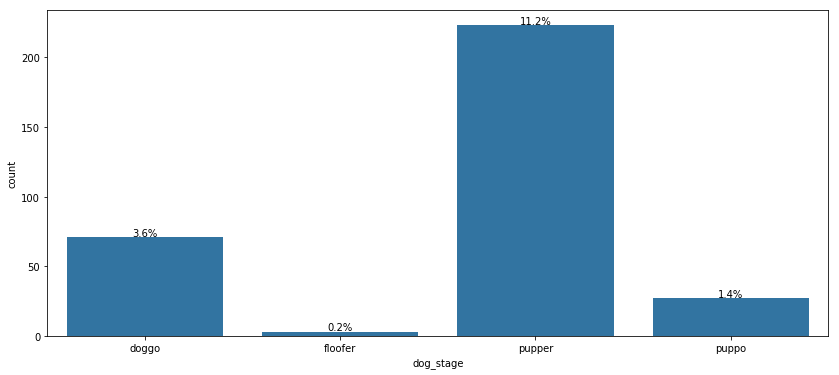

In [81]:
# create the plot
plt.figure(figsize=[14,6])
base_color = sb.color_palette()[0]
sb.countplot(data=df_archive_clean, x='dog_stage', color=base_color);

# add annotations
n_points = df_archive_clean.shape[0]
cat_counts = df_archive_clean['dog_stage'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    
    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    # print the annotation 
    plt.text(loc, count+1, pct_string, ha='center')

In [3]:
df_archive_clean['dog_stage'].value_counts()

NameError: name 'df_archive_clean' is not defined

2. What is the top 10 most predicted dog breeds?

In [82]:
p1_counts = df_archive_clean['p1'].value_counts()
p1_counts

golden_retriever             138
Labrador_retriever           93 
Pembroke                     88 
Chihuahua                    79 
pug                          54 
chow                         41 
Samoyed                      39 
Pomeranian                   38 
toy_poodle                   38 
malamute                     29 
cocker_spaniel               27 
French_bulldog               25 
Chesapeake_Bay_retriever     23 
miniature_pinscher           22 
seat_belt                    21 
German_shepherd              20 
Siberian_husky               20 
Eskimo_dog                   18 
Shetland_sheepdog            18 
teddy                        18 
Staffordshire_bullterrier    18 
Maltese_dog                  18 
Cardigan                     17 
Rottweiler                   17 
beagle                       17 
Shih-Tzu                     17 
Lakeland_terrier             16 
kuvasz                       16 
Italian_greyhound            16 
web_site                     15 
          

In [83]:
top_10 = p1_counts.index[:10]
mask = df_archive_clean['p1'].isin(top_10)
top_10_p1 = df_archive_clean.loc[mask]
p1_order = top_10_p1['p1'].value_counts().index

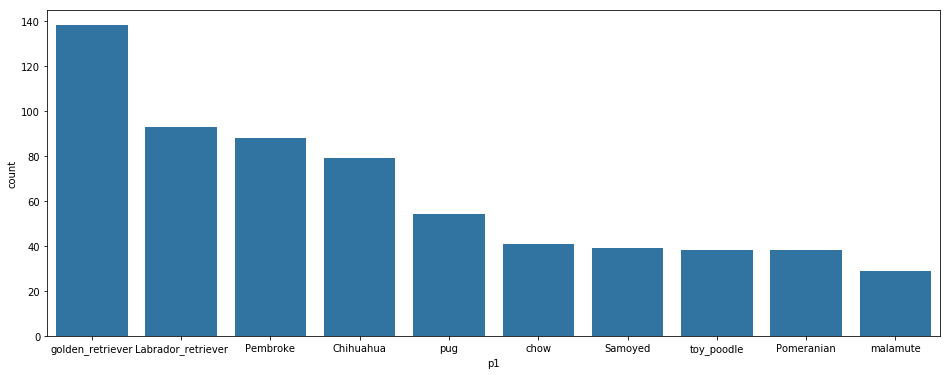

In [84]:
# create the plot
plt.figure(figsize=[16,6])
base_color = sb.color_palette()[0]
sb.countplot(data=top_10_p1, x='p1', color=base_color, order=p1_order);

3. Plot favorites over time

In [85]:
# create copy of df_archive_clean with variables needed
time_df = df_archive_clean[['timestamp', 'favorite_count']].copy()

In [86]:
# set the index to be the timestamp so time is displayed properly in plots
time_df.set_index('timestamp', inplace=True)

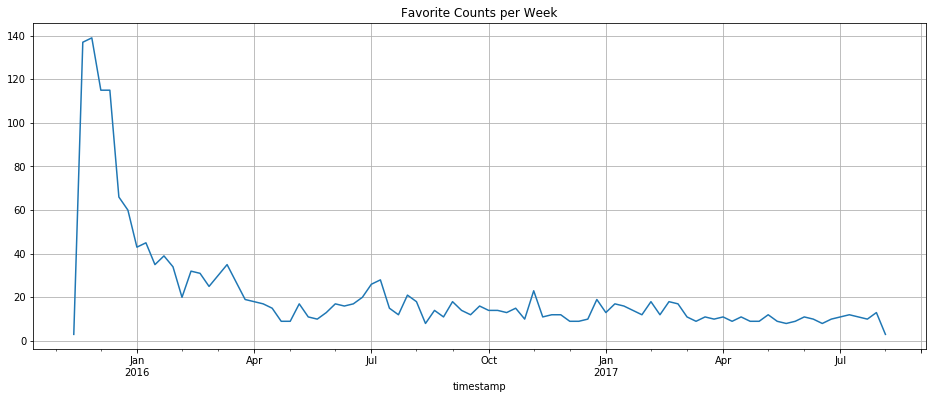

In [87]:
# create the plot
fc = time_df.resample('W').size()
fc.plot(figsize=(16,6), title='Favorite Counts per Week', grid=True );